
# Especialización en ***Credit Scoring***
### **Aron Uriarte Zaga**

**Estimación de Default**


Una empresa microfinanciera acaba de apertura una nueva de préstamo de libre
disponibilidad con una apertura esperado, sin embargo, al analizar la mora a 30 días se
encontró que la tasa de default se encuentra por encima de lo esperado (8%).
Por lo que a partir de la información recopilada de las solicitudes de préstamos, se quiere
identificar el perfil y la probabilidad de los clientes con mayor propensión en caer en default
a través de técnicas estadísticas y algoritmos de Machine Learning.

## Análisis exploratorio

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

Los datos para este ejercicio pertenecen a un cartera de créditos de consumo personal, banca personas.

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv('Dataset.csv', sep = ";")
df.head(5)

,id,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,1,1,1,1,1,1,Si
1,2,3,1,1,1,1,Si
2,3,2,1,1,1,1,Si
3,4,1,2,1,1,1,Si
4,5,1,1,1,1,1,Si


In [5]:
df.drop(['id'], axis=1, inplace=True) #Eliminammos La variable ID ya que no aporta al estudio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MontoCredito       4919 non-null   int64 
 1   IngresoNeto        4919 non-null   int64 
 2   CoefCreditoAvaluo  4919 non-null   int64 
 3   MontoCuota         4919 non-null   int64 
 4   GradoAcademico     4919 non-null   int64 
 5   BuenPagador        4919 non-null   object
dtypes: int64(5), object(1)
memory usage: 230.7+ KB


<Axes: >

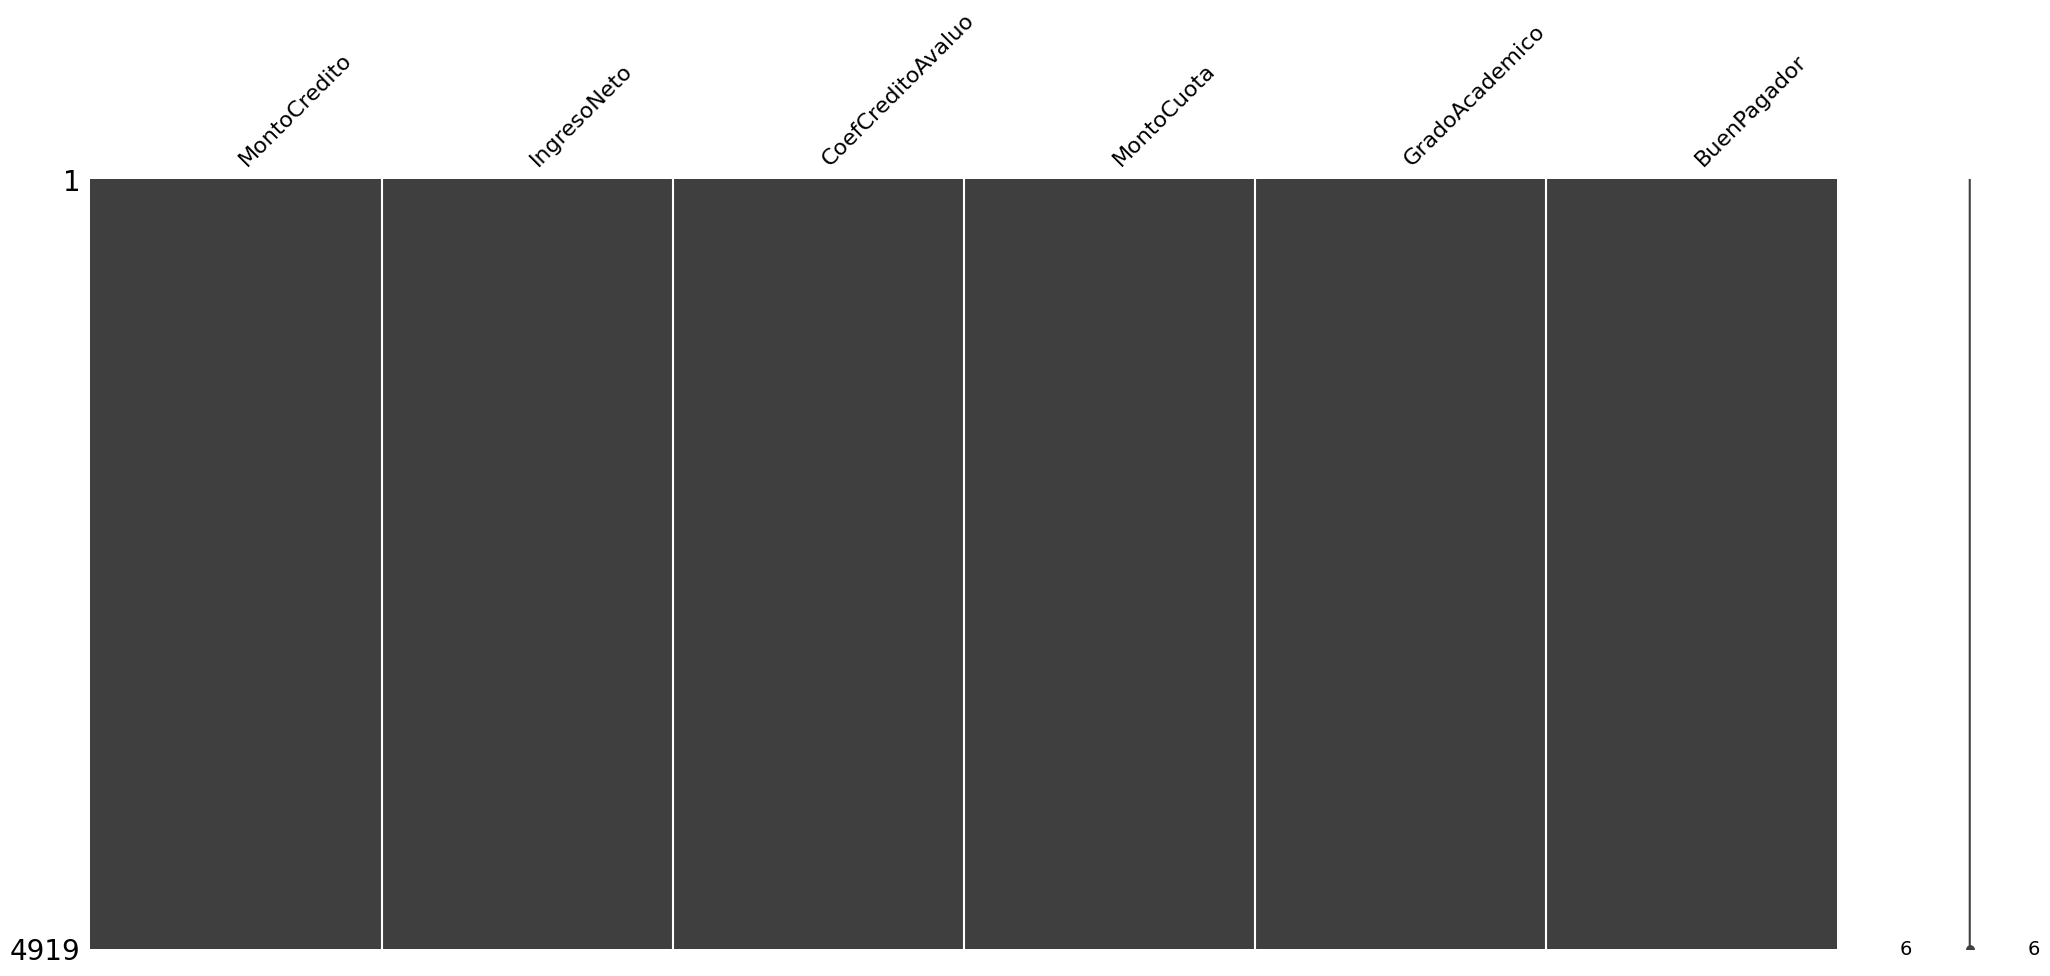

In [7]:
import missingno as msno
msno.matrix(df)

In [8]:
df.columns

Index(['MontoCredito', 'IngresoNeto', 'CoefCreditoAvaluo', 'MontoCuota',
       'GradoAcademico', 'BuenPagador'],
      dtype='object')

In [9]:
df['MontoCredito'] = df['MontoCredito'].astype(object)
df['IngresoNeto'] = df['IngresoNeto'].astype(object)
df['CoefCreditoAvaluo'] = df['CoefCreditoAvaluo'].astype(object)
df['MontoCuota'] = df['MontoCuota'].astype(object)
df['GradoAcademico'] = df['GradoAcademico'].astype(object)


In [10]:
df['BuenPagador'] = df['BuenPagador'].map({'Si': 0, 'No': 1})

In [11]:
df.describe(include=['O'])

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
count,4919,4919,4919,4919,4919
unique,4,2,12,4,2
top,1,2,12,3,1
freq,2471,2714,2476,2651,2567


In [12]:
df['BuenPagador'].value_counts(1)*100

0    86.501321
1    13.498679
Name: BuenPagador, dtype: float64

<bound method Series.sort_index of 0    0.865013
1    0.134987
Name: BuenPagador, dtype: float64>

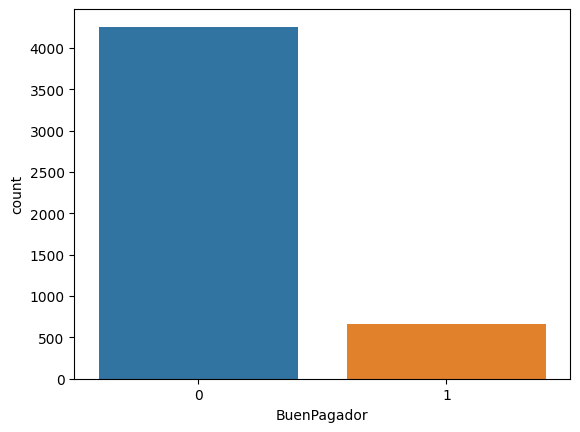

In [13]:
sns.countplot(data = df, x = "BuenPagador")
df['BuenPagador'].value_counts(1).sort_index

Observamos un gran desbalance de los datos ya que la proporcion de los datos esta en 0.865 - 0.135 muy alejado al minimo permitido 33.3 - 66.6

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MontoCredito       4919 non-null   object
 1   IngresoNeto        4919 non-null   object
 2   CoefCreditoAvaluo  4919 non-null   object
 3   MontoCuota         4919 non-null   object
 4   GradoAcademico     4919 non-null   object
 5   BuenPagador        4919 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 230.7+ KB


In [15]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [16]:
def getFeactureIV_Importance(df,feactures,target):
    feactureIV_Importance=list()
    #feacture,target
    for v in feactures:
      iv, rep=calculate_woe_iv(df,v,target)
      feactureIV_Importance.append(iv)
    #pd.DataFrame({"Feacture":feactures,"IV":feactureIV_Importance}).sort_values("IV")
    display(pd.DataFrame({"Feacture":feactures,"IV":feactureIV_Importance}).sort_values("IV"))

VARIABLE: Monto Credito

<bound method Series.sort_index of 1    0.502338
2    0.267331
3    0.177882
4    0.052450
Name: MontoCredito, dtype: float64>

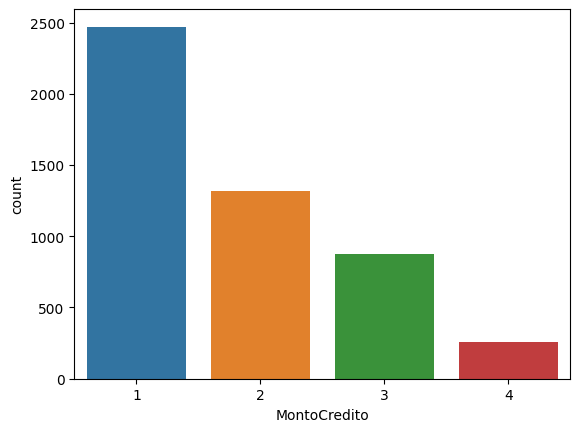

In [17]:
sns.countplot(data = df, x = "MontoCredito")
df['MontoCredito'].value_counts(1).sort_index

BuenPagador               
                   count  sum      mean
MontoCredito                           
1                   2471  223  0.090247
2                   1315  143  0.108745
3                    875  229  0.261714
4                    258   69  0.267442

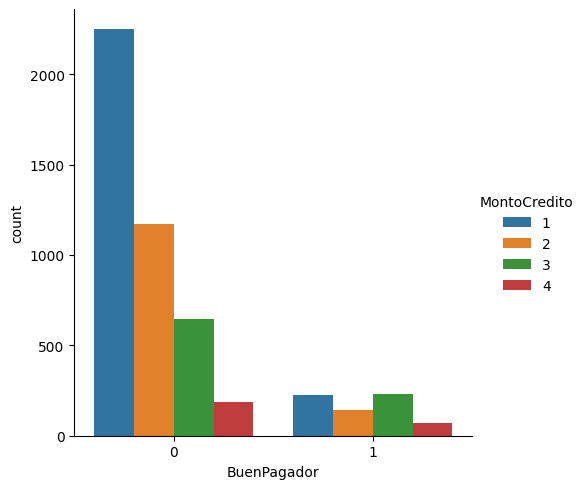

In [18]:
sns.catplot(x='BuenPagador',data=df,hue='MontoCredito',kind="count")
df[['MontoCredito', 'BuenPagador']].groupby(['MontoCredito'], as_index=False).agg(['count','sum','mean'])

In [19]:
#La variable Monto credito se observa que en la Categoria Medio y Alto se observa mas del 50& de los malos pagadores siendo esta una variable muy significativa

In [20]:
IV_v, ReporteWoe_v=calculate_woe_iv(df, "MontoCredito", "BuenPagador")
IV_v

0.3109561358333653

In [21]:
# El valor del IV es igual a 31.09% lo cual se interpreta como una variable un fuerte poder predictivo por lo tanto nos quedaremos
# con esta variable para el modelo final

VARIABLE: INGRESO NETO

<bound method Series.sort_index of 2    0.551738
1    0.448262
Name: IngresoNeto, dtype: float64>

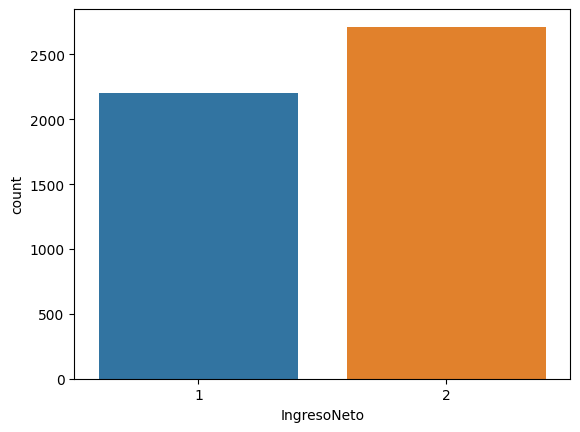

In [22]:
sns.countplot(data = df, x = "IngresoNeto")
df['IngresoNeto'].value_counts(1).sort_index

BuenPagador               
                  count  sum      mean
IngresoNeto                           
1                  2205  441  0.200000
2                  2714  223  0.082167

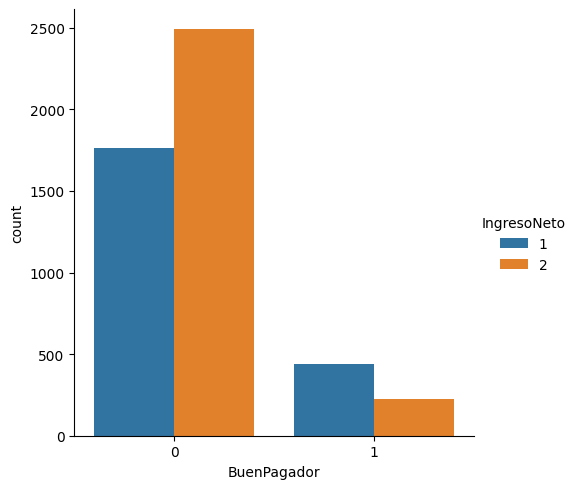

In [23]:
sns.catplot(x='BuenPagador',data=df,hue='IngresoNeto',kind="count")
df[['IngresoNeto', 'BuenPagador']].groupby(['IngresoNeto'], as_index=False).agg(['count','sum','mean'])

In [24]:
#Observamos que en la categoria BUEN PAGADOR = NO se tiene una mayor frecuencia en la Categoria Ingreso Neto = Muy bajo a diferencia
#de la categoria BUEN PAGADOR = SI donde se tiene una clara mayor frecuencia en las categorias Bajo, tambien vemos que no existe ingresos Netos
#de valor Medio y Alto por lo tanto podemos inferir que el estudio solo concentra a Clientes con ingresos Muy bajos y Bajos

In [25]:
IV_v, ReporteWoe_v=calculate_woe_iv(df, "IngresoNeto", "BuenPagador")
IV_v

0.2563176997857861

In [26]:
# El valor del IV es igual a 25.6% lo cual se interpreta como una variable un medio poder predictivo por lo tanto nos quedaremos
# con esta variable para el modelo final

VARIABLE: COEF CREDITO AVALUO

<bound method Series.sort_index of 12    0.503354
11    0.298841
1     0.039236
7     0.031917
4     0.031307
6     0.028868
5     0.026631
10    0.014637
9     0.014434
3     0.005082
2     0.003049
8     0.002643
Name: CoefCreditoAvaluo, dtype: float64>

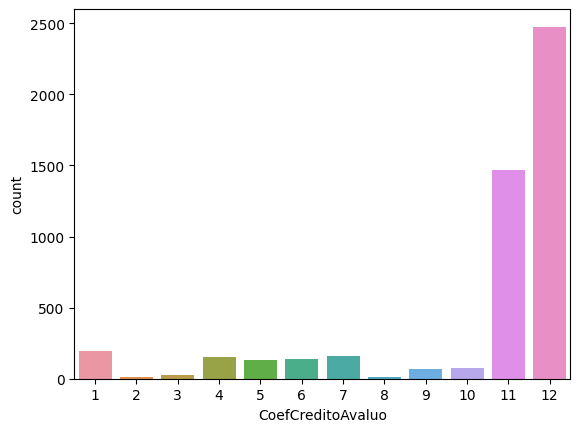

In [27]:
sns.countplot(data = df, x = "CoefCreditoAvaluo")
df['CoefCreditoAvaluo'].value_counts(1).sort_index

In [28]:
#Observando el grafico vizualizamos mas categorias de las que nos muestra el diccionario, estas podrian estar categorizadas ordinal
#o Nominal no sabemos que tipo de variable Cualitava por lo tanto abordaremos el problema segun las metricas del IV

BuenPagador               
                        count  sum      mean
CoefCreditoAvaluo                           
1                         193   23  0.119171
2                          15    0  0.000000
3                          25    0  0.000000
4                         154   53  0.344156
5                         131   19  0.145038
6                         142   50  0.352113
7                         157    8  0.050955
8                          13    8  0.615385
9                          71   40  0.563380
10                         72    7  0.097222
11                       1470  313  0.212925
12                       2476  143  0.057754

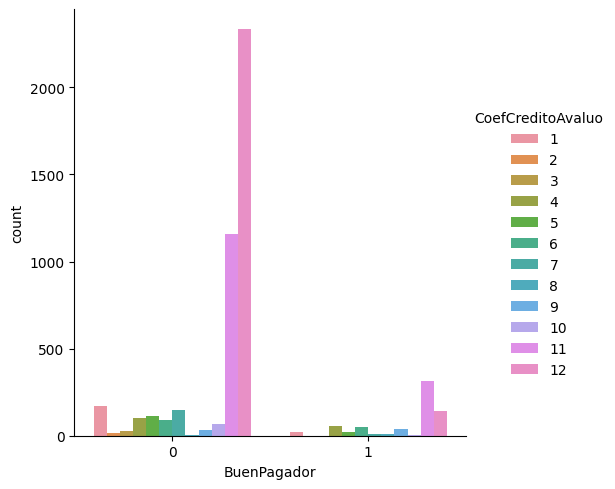

In [29]:
sns.catplot(x='BuenPagador',data=df,hue='CoefCreditoAvaluo',kind="count")
df[['CoefCreditoAvaluo', 'BuenPagador']].groupby(['CoefCreditoAvaluo'], as_index=False).agg(['count','sum','mean'])

In [30]:
IV_v, ReporteWoe_v=calculate_woe_iv(df, "CoefCreditoAvaluo", "BuenPagador")
IV_v

0.7202541696836787

In [31]:
#Debio que la metrica IV es 72% -> muy alta, realizaremos una agruacion de las Categorias de las variable CoefCreditoAvaluo
#Es decir la abordaremos como si esta fuera de tipo Ordinal

In [32]:
df['CoefCreditoAvaluo'] = df['CoefCreditoAvaluo'].replace([1,2,3],1)
df['CoefCreditoAvaluo'] = df['CoefCreditoAvaluo'].replace([4,5,6],2)
df['CoefCreditoAvaluo'] = df['CoefCreditoAvaluo'].replace([7,8,9],3)
df['CoefCreditoAvaluo'] = df['CoefCreditoAvaluo'].replace([10,11,12],4)

BuenPagador               
                        count  sum      mean
CoefCreditoAvaluo                           
1                         233   23  0.098712
2                         427  122  0.285714
3                         241   56  0.232365
4                        4018  463  0.115231

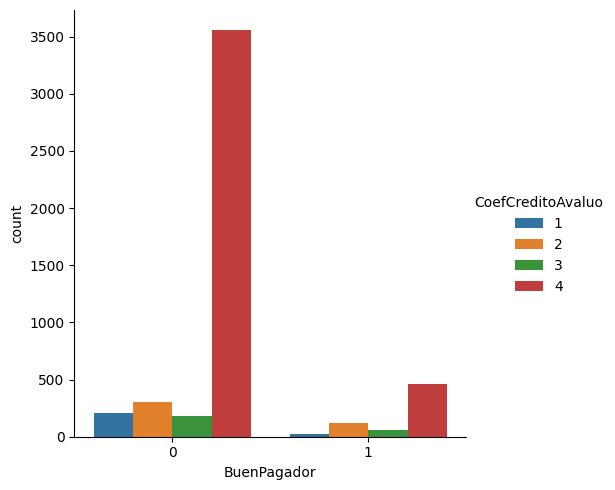

In [33]:
sns.catplot(x='BuenPagador',data=df,hue='CoefCreditoAvaluo',kind="count")
df[['CoefCreditoAvaluo', 'BuenPagador']].groupby(['CoefCreditoAvaluo'], as_index=False).agg(['count','sum','mean'])

In [34]:
#Observamos que las Categoria 2 y 3 contienen mas del 50% de los Malos pagadores siendo estas categorias las mas relevantes para el estudio

In [35]:
IV_v, ReporteWoe_v=calculate_woe_iv(df, "CoefCreditoAvaluo", "BuenPagador")
IV_v

0.1627444007279706

In [36]:
#Podemos observar que esta variable luego de su agrupacion tiene un IV del 16.3%, por lo tanto tiene un Poder Predictivo: Medio y la conservaremos en el modelo Final

VARIABLE: MONTO CUOTA

<bound method Series.sort_index of 3    0.538931
2    0.275869
4    0.124009
1    0.061191
Name: MontoCuota, dtype: float64>

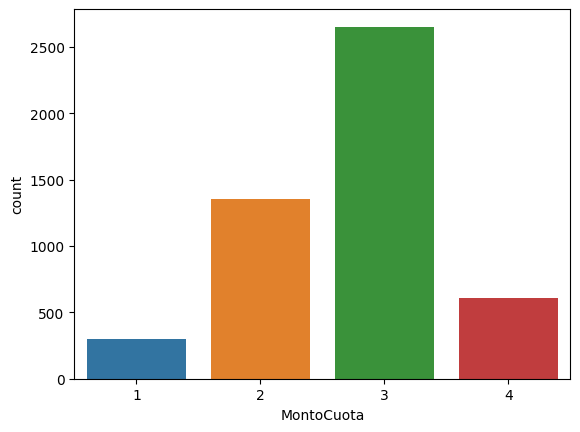

In [37]:
sns.countplot(data = df, x = "MontoCuota")
df['MontoCuota'].value_counts(1).sort_index

BuenPagador               
                 count  sum      mean
MontoCuota                           
1                  301   62  0.205980
2                 1357  126  0.092852
3                 2651  312  0.117691
4                  610  164  0.268852

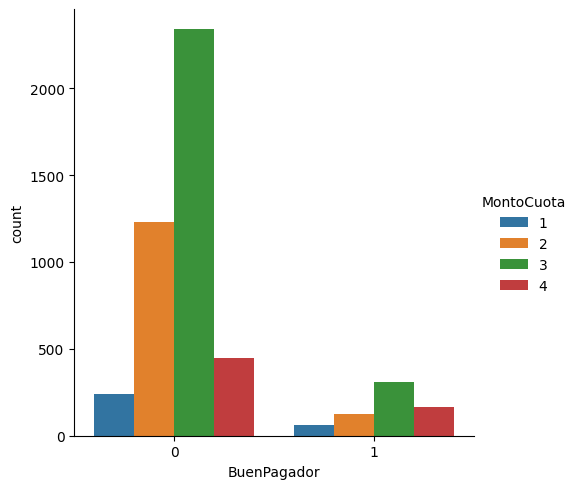

In [38]:
sns.catplot(x='BuenPagador',data=df,hue='MontoCuota',kind="count")
df[['MontoCuota', 'BuenPagador']].groupby(['MontoCuota'], as_index=False).agg(['count','sum','mean'])

In [39]:
#La variable Monto Cuota se observa que el los Montos muy bajos y alto contienen una gran proporcion de los Malos Pagadores siendo mayor al 45%

In [40]:
IV_v, ReporteWoe_v=calculate_woe_iv(df, "MontoCuota", "BuenPagador")
IV_v

0.19527271736924795

In [41]:
#Se observar que el IV de la Variable es de 19.52% lo cual tiene un poder predictivo: Medio y la conservaremos para el estudio

VARIABLE: GradoAcademico

<bound method Series.sort_index of 1    0.521854
2    0.478146
Name: GradoAcademico, dtype: float64>

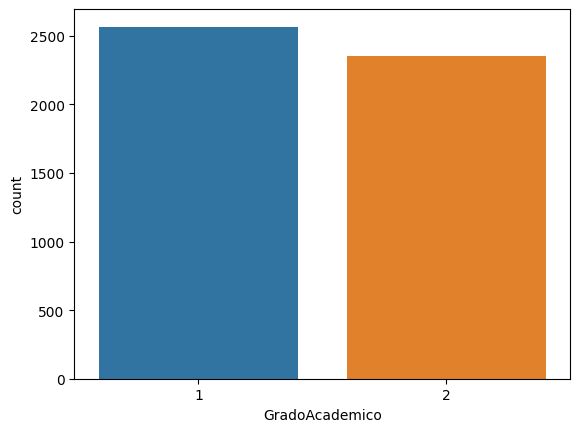

In [42]:
sns.countplot(data = df, x = "GradoAcademico")
df['GradoAcademico'].value_counts(1).sort_index

BuenPagador               
                     count  sum      mean
GradoAcademico                           
1                     2567  418  0.162836
2                     2352  246  0.104592

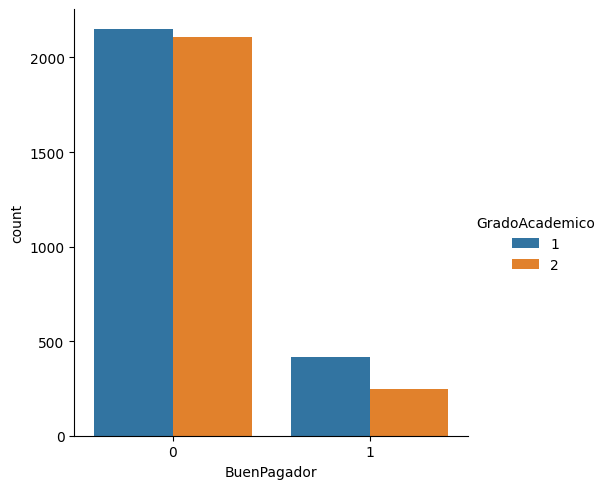

In [43]:
sns.catplot(x='BuenPagador',data=df,hue='GradoAcademico',kind="count")
df[['GradoAcademico', 'BuenPagador']].groupby(['GradoAcademico'], as_index=False).agg(['count','sum','mean'])

In [44]:
#Observamos que la proporcion de Malos pagadores dentro de las categorias no es muy Significativa para el estudio verificaremos en el IV a continuacion

In [45]:
IV_v, ReporteWoe_v=calculate_woe_iv(df, "GradoAcademico", "BuenPagador")
IV_v

0.06346949349771501

In [46]:
#Debio a que el IV es igual  a 6.3% no consideraremos la variable en el estudio

Obteniendo el Train & Test

In [47]:
df.head()

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,1,1,1,1,1,0
1,3,1,1,1,1,0
2,2,1,1,1,1,0
3,1,2,1,1,1,0
4,1,1,1,1,1,0


**Balanceo de las clases de variable a predecir BUEN PAGADOR**

In [48]:
df['BuenPagador']=df['BuenPagador'].astype(int)

In [49]:
count_class_0, count_class_1 = df.BuenPagador.value_counts()

# Divide by class
df_class_0 = df[df['BuenPagador'] == 0]
df_class_1 = df[df['BuenPagador'] == 1]

In [52]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(4255, 4255, 664, 664)

In [ ]:

df['BuenPagador'].value_counts(0)

In [54]:
#APLICAMOS BALANCEO POR OVERSAMPLING

Random over-sampling:
0    4255
1    4255
Name: BuenPagador, dtype: int64


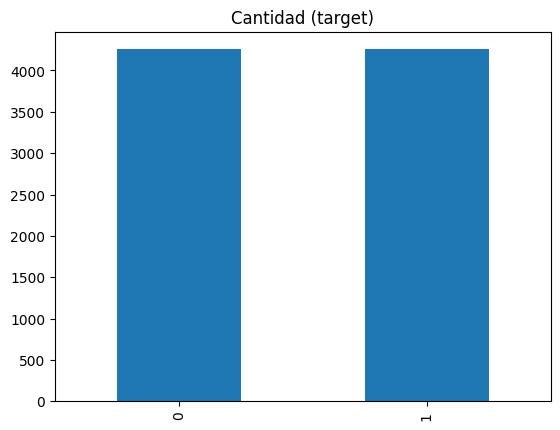

In [55]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.BuenPagador.value_counts())

df_over.BuenPagador.value_counts().plot(kind='bar', title='Cantidad (target)');

In [56]:
#Aqui observamos las categorias balanceada

In [57]:
label_upsample = df_over["BuenPagador"]
df_over.drop("BuenPagador",inplace = True, axis = 1) #Eliminamos la variable Traget para realizar el Train y Test
df_over.drop("GradoAcademico",inplace = True, axis = 1) # Eliminamos la Variable GradoAcademico ya que no aportara significativamente al modelo

In [58]:
# REALIZAMOS LA PARTICION DE LA DATA EN TRAIN Y TEST
from sklearn.model_selection import train_test_split

X_train_o, X_test, y_train_o, y_test = train_test_split(df_over, label_upsample, test_size = 0.3)     #REALIZAMOS LA PARTICION CON NUESTRA DATA BALANCEADA CON OVERSAMPLIN

 **Modelamiento**

In [ ]:
#TRAIN OVERSAMPLING

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [60]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Contacto NO Efectivo', 'Contacto Efectivo']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Contacto NO Efectivo', 'Contacto Efectivo']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       0.78      0.61      0.69      1298
           1       0.67      0.82      0.74      1255

    accuracy                           0.71      2553
   macro avg       0.72      0.72      0.71      2553
weighted avg       0.73      0.71      0.71      2553

AUC ROC :  0.7158021227877396


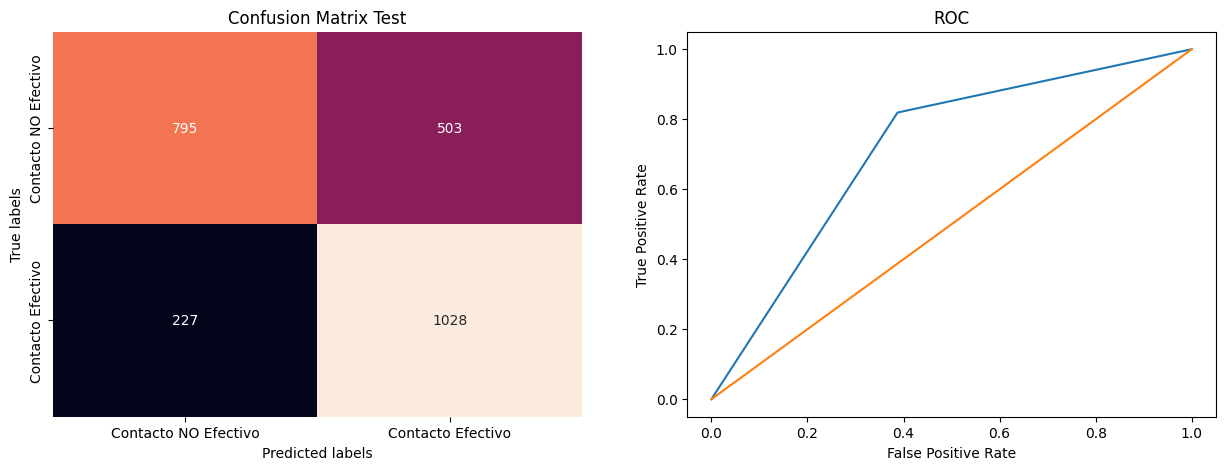

In [61]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_o, X_test, y_train_o, y_test)

In [ ]:
#Observamos que la precision es igual a 73% lo cual no es muy bajo sin embargo probaremos con otros Modelos para descubrir al mas robusto

              precision    recall  f1-score   support

           0       0.78      0.61      0.68      1298
           1       0.67      0.82      0.74      1255

    accuracy                           0.71      2553
   macro avg       0.73      0.72      0.71      2553
weighted avg       0.73      0.71      0.71      2553

AUC ROC :  0.7162665209731183


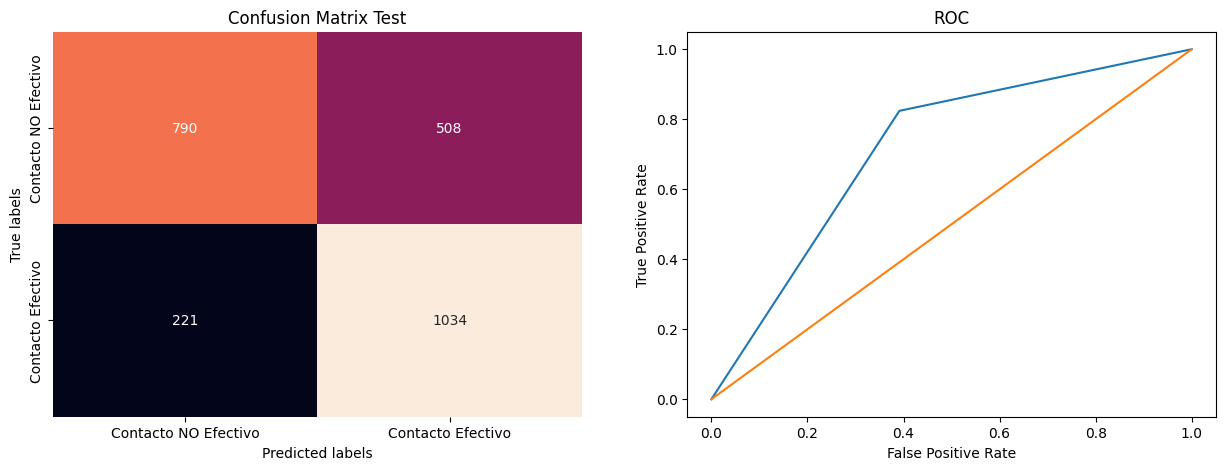

In [66]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_o, X_test, y_train_o, y_test)

In [ ]:
##Observamos que la precision es muy similar al de arboles de decision asi que seguiremos probando con otro modelo

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1303
           1       0.65      0.66      0.65      1250

    accuracy                           0.66      2553
   macro avg       0.66      0.66      0.66      2553
weighted avg       0.66      0.66      0.66      2553

AUC ROC :  0.657223944742901


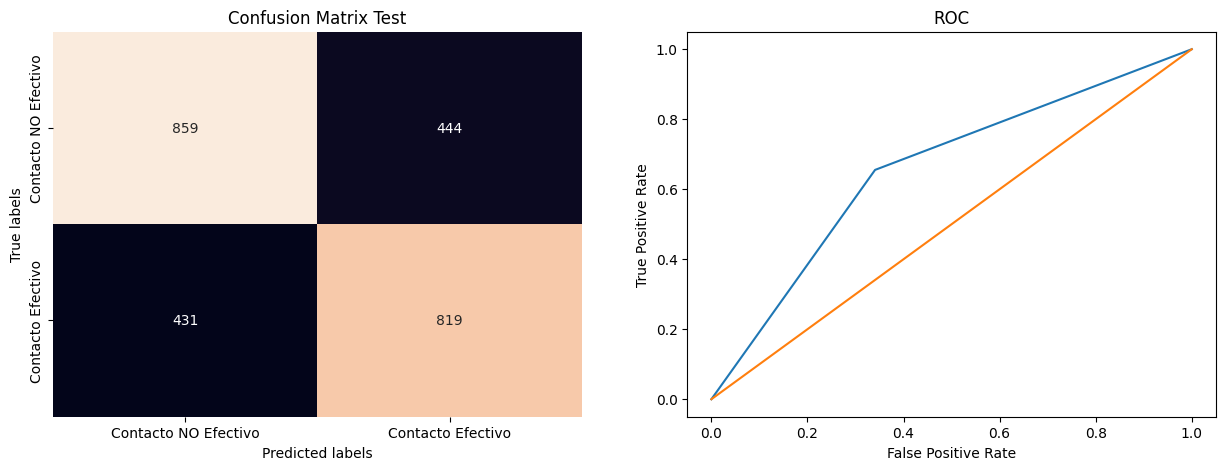

In [60]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_o, X_test, y_train_o, y_test)

In [ ]:
#Aqui si vizualizamos que la precision bajo asi que el mejor modelo por el que obtariamos seria el Modelo de Random Forest